# MNIST Dataset: Image Classification with a Feedforward Neural Network
**Date:** February 4, 2025  
**Author:** Dario Piga  

In this notebook, we will implement a **feedforward neural network (FNN)** using PyTorch to classify images from the **MNIST** dataset. MNIST consists of **70,000 grayscale images** of handwritten digits (0-9), with **60,000** images used for training and **10,000** for testing.

## The MNIST Dataset

The MNIST dataset contains images of **handwritten digits**, categorized into the following **10 classes**:
- **0**
- **1**
- **2**
- **3**
- **4**
- **5**
- **6**
- **7**
- **8**
- **9**

Each image is a **28×28 grayscale image**.

## Implementation Steps

1. **Load the MNIST dataset** using PyTorch's `torchvision.datasets`
2. **Preprocess the images** (convert to tensors, normalize pixel values)
3. **Define a feedforward neural network** with fully connected layers
4. **Train the model** using **cross-entropy loss** and the **Adam optimizer**
5. **Evaluate the model** on the test dataset
6. **Visualize some predictions**


In [11]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Define transformations: Convert to Tensor and Normalize
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load entire dataset as tensors
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Extract images and labels
X_train = torch.stack([trainset[i][0] for i in range(len(trainset))])  # Shape: [60000, 1, 28, 28]
y_train = torch.tensor([trainset[i][1] for i in range(len(trainset))])  # Shape: [60000]

X_test = torch.stack([testset[i][0] for i in range(len(testset))])  # Shape: [10000, 1, 28, 28]
y_test = torch.tensor([testset[i][1] for i in range(len(testset))])  # Shape: [10000]

# Print dataset shapes
print(f"Training set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set: X_test {X_test.shape}, y_test {y_test.shape}")


Training set: X_train torch.Size([60000, 1, 28, 28]), y_train torch.Size([60000])
Test set: X_test torch.Size([10000, 1, 28, 28]), y_test torch.Size([10000])


In [ ]:
# show some images (TBD)
...

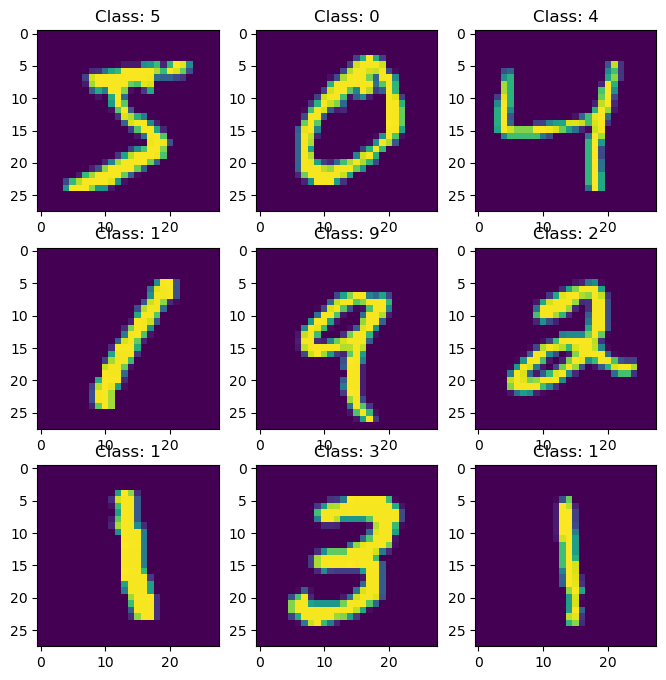

In [18]:
# show some images


plt.figure(figsize = (8, 8))

for i in range(9):
    img = X_train[i,:].numpy().squeeze()  # Convert PyTorch tensor to NumPy
    #img = np.transpose(img, (1, 2, 0))  # Change shape from (C, H, W) to (H, W, C)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"Class: {y_train[i]}")


In [ ]:
# Define your FeedForward Network (TBD)
...


In [5]:
# Define your FeedForward Network (TBD)

import torch.nn.functional as F

class FeedforwardNN(nn.Module):
    def __init__(self, input_dim=32*32*3, hidden1=512, hidden2=256, num_classes=10):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_classes)
        self.softmax = nn.Softmax(dim=1)  # Apply Softmax on output layer

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        z = self.fc3(x)
        p = self.softmax(z)  # Apply Softmax to return probabilities
        return p


model = FeedforwardNN(input_dim = X_train.shape[1]*X_train.shape[2]*X_train.shape[3], hidden1=254, hidden2=64, num_classes=10)

print(f"Model structure: {model}")

for name, params in model.named_parameters():
    print(f"parameter name: {name}. Value {params.data}")

# check what model provides:
y_hat = model(X_train)
y_hat.shape


Model structure: FeedforwardNN(
  (fc1): Linear(in_features=784, out_features=254, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=254, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
parameter name: fc1.weight. Value tensor([[ 1.3666e-02, -7.2816e-03, -3.4581e-02,  ...,  1.0863e-02,
         -1.9064e-02,  1.7403e-03],
        [ 1.8673e-02, -2.2021e-02,  1.3027e-02,  ..., -2.5649e-02,
          2.9068e-02,  1.7053e-02],
        [-2.4817e-02,  1.1075e-02, -2.9053e-02,  ...,  7.2330e-05,
         -4.2267e-03,  3.5097e-02],
        ...,
        [ 5.5261e-04, -2.1869e-02,  3.6739e-03,  ..., -1.1097e-02,
         -1.9780e-02,  8.4102e-03],
        [-2.1207e-02, -1.2517e-02, -2.0238e-02,  ..., -1.5902e-02,
         -2.0066e-02,  2.3476e-02],
        [-2.2623e-02,  4.7791e-04, -1.5436e-02,  ..., -1.6470e-02,
          4.8534e-04,  3.9159e-03]])
parameter name: fc1.bias. Value tensor([-0.0236,  0.0

torch.Size([60000, 10])

In [6]:
# Define the loss function 
criterion = nn.NLLLoss()  # Multi-class classification loss

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [ ]:
# Training loop (TBD)
...

In [7]:
# Training loop with accuracy calculation
max_epochs = 8000
for it in range(max_epochs):
    optimizer.zero_grad()
    i = np.random.randint(0, X_train.shape[0], size = 1024) # mini-batch implementation
    y_hat = model(X_train[i,:])  # Predictions (probabilities with Softmax)
    loss = criterion(y_hat, y_train[i])  # Compute loss
    loss.backward()
    optimizer.step()

    if it % 5 == 0:  # Print every 5 iterations
        with torch.no_grad():
            y_hat = model(X_train)
            predicted_labels = torch.argmax(y_hat, dim=1)  # Get predicted class
            accuracy = (predicted_labels == y_train).float().mean().item()  # Compute accuracy
        
        print(f"Iteration: {it}. Loss: {loss.item():.3f}, Accuracy: {accuracy:.2%}")

    

Iteration: 0. Loss: -0.100, Accuracy: 10.16%
Iteration: 5. Loss: -0.099, Accuracy: 10.16%
Iteration: 10. Loss: -0.100, Accuracy: 10.17%
Iteration: 15. Loss: -0.100, Accuracy: 10.17%
Iteration: 20. Loss: -0.100, Accuracy: 10.18%
Iteration: 25. Loss: -0.100, Accuracy: 10.18%
Iteration: 30. Loss: -0.101, Accuracy: 10.18%
Iteration: 35. Loss: -0.100, Accuracy: 10.19%
Iteration: 40. Loss: -0.100, Accuracy: 10.19%
Iteration: 45. Loss: -0.100, Accuracy: 10.19%
Iteration: 50. Loss: -0.100, Accuracy: 10.20%
Iteration: 55. Loss: -0.100, Accuracy: 10.20%
Iteration: 60. Loss: -0.101, Accuracy: 10.20%
Iteration: 65. Loss: -0.100, Accuracy: 10.20%
Iteration: 70. Loss: -0.101, Accuracy: 10.21%
Iteration: 75. Loss: -0.100, Accuracy: 10.21%
Iteration: 80. Loss: -0.100, Accuracy: 10.22%
Iteration: 85. Loss: -0.100, Accuracy: 10.22%
Iteration: 90. Loss: -0.100, Accuracy: 10.22%
Iteration: 95. Loss: -0.101, Accuracy: 10.22%
Iteration: 100. Loss: -0.100, Accuracy: 10.22%
Iteration: 105. Loss: -0.100, Accur

In [ ]:
# assess model performance (TBD)
...

In [8]:
import matplotlib.pyplot as plt

def assess_results(model, X, y, data_type):
    with torch.no_grad():
        p_hat = model(X).squeeze()  # Get the predicted probabilities
        predicted_labels = torch.argmax(p_hat, dim=1)  # Get predicted class
        
        # Compute accuracy
        accuracy = (predicted_labels == y).float().mean().item()  # Compute accuracy

        plt.figure(figsize = (12,12))
        rand_values = np.random.randint(0, X.shape[0], size = 9)
        for count, i in enumerate(rand_values):
            plt.subplot(3,3,count+1)
            plt.imshow(X[i,:].numpy().squeeze())
            plt.title(f"{data_type}. Predicted class: {predicted_labels[i]}. True: {y[i]}")


        # Print confusion matrix results
        print(f"Accuracy: {accuracy*100:.3f} % ")

        


Training results
Accuracy: 66.053 % 
Test results
Accuracy: 66.570 % 


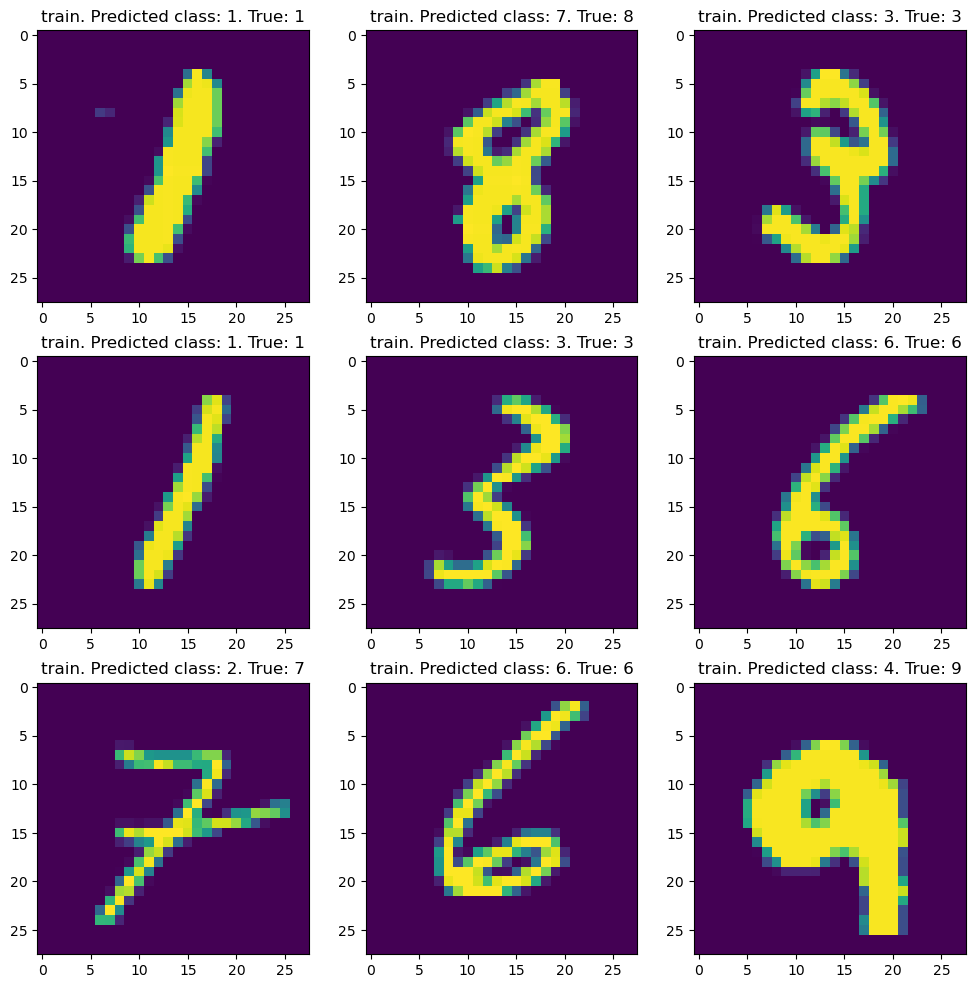

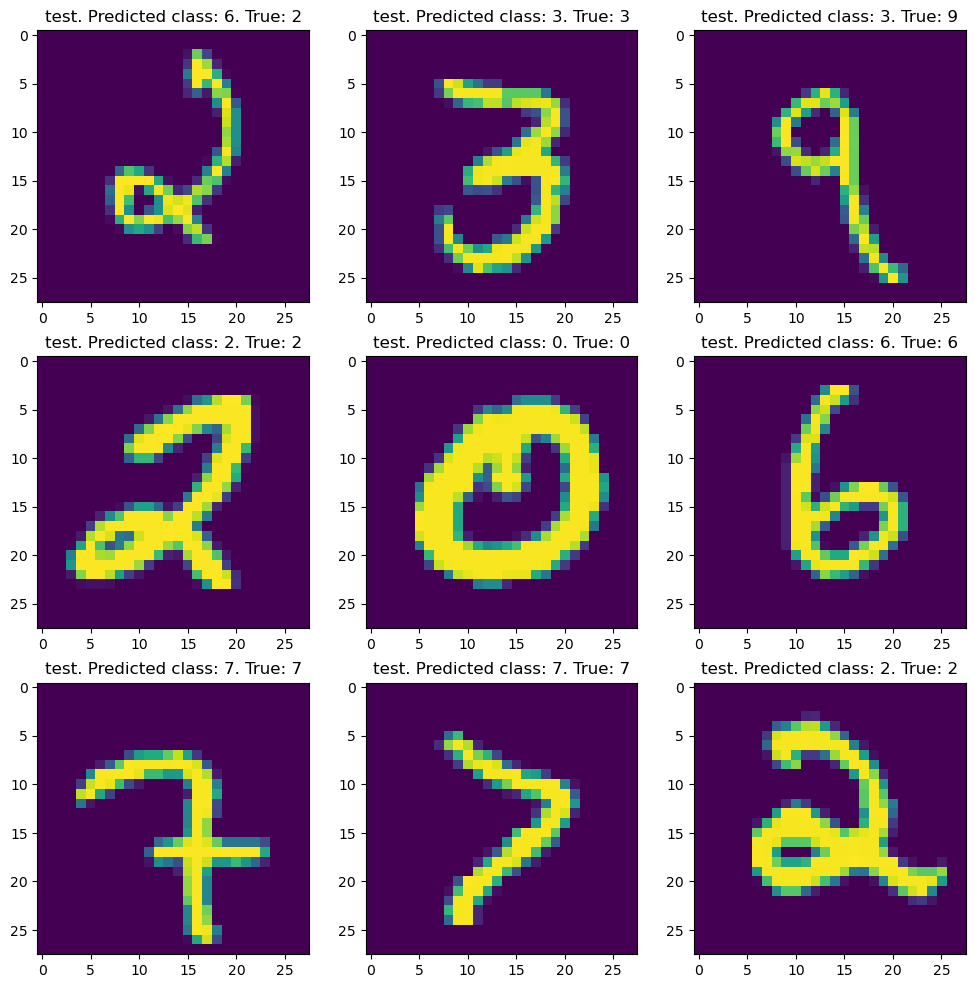

In [9]:
# Assess results in training
print('Training results')

assess_results(model, X_train, y_train, data_type = 'train')
#print(f"rmse = {rmse}. R2 = {R2:.3f}")


# Assess results in test
print('Test results')

assess_results(model, X_test, y_test, data_type = 'test')
#print(f"rmse = {rmse}. R2 = {R2:.3f}")
